In [1]:
import numpy as np
from keras.datasets import imdb
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [3]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [4]:
print X.shape
print y.shape

(50000,)
(50000,)


In [5]:
np.unique(y)

array([0, 1])

In [6]:
len(np.unique(np.hstack(X)))

88585

In [7]:
results = map(len, X)
np.mean(results), np.std(results)

(234.75891999999999, 172.91149458735703)

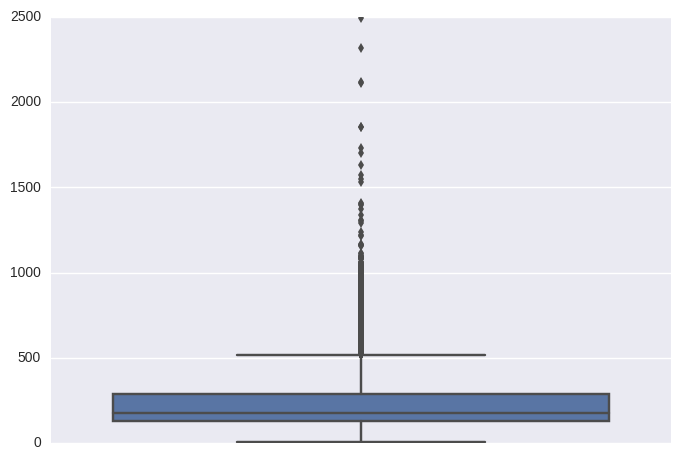

In [8]:
sns.boxplot(y=results)
plt.show()

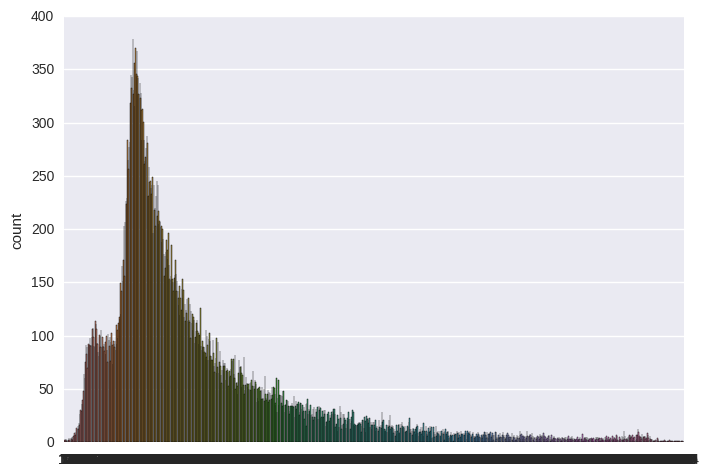

In [9]:
sns.countplot(x=results)
plt.show()

In [10]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=5000)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
seed = 7
np.random.seed(seed)

In [ ]:
top_words = 5000
test_split = 0.33
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)

In [ ]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [21]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [22]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_2 (Embedding)          (None, 500, 32)       160000      embedding_input_2[0][0]          
____________________________________________________________________________________________________
flatten_2 (Flatten)              (None, 16000)         0           embedding_2[0][0]                
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 250)           4000250     flatten_2[0][0]                  
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 1)             251         dense_3[0][0]                    
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_______________

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/2


In [28]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [29]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 4s - loss: 0.4240 - acc: 0.7761 - val_loss: 0.2754 - val_acc: 0.8860